<a href="https://colab.research.google.com/github/Ahmad3752/Colab/blob/main/Performance_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df=pd.read_csv('/content/heart.csv')

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
df=pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<Axes: xlabel='target'>

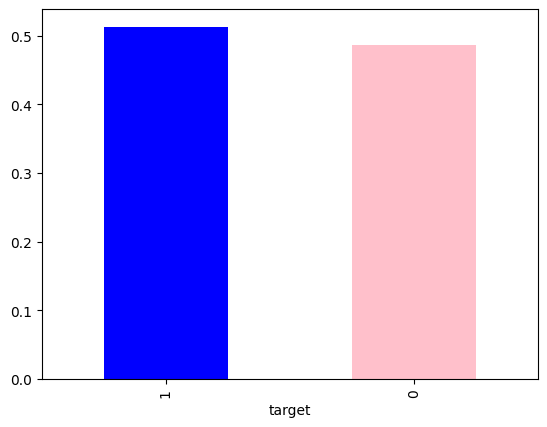

In [4]:
df['target'].value_counts(normalize=True).plot(kind='bar',color=['blue','pink'])

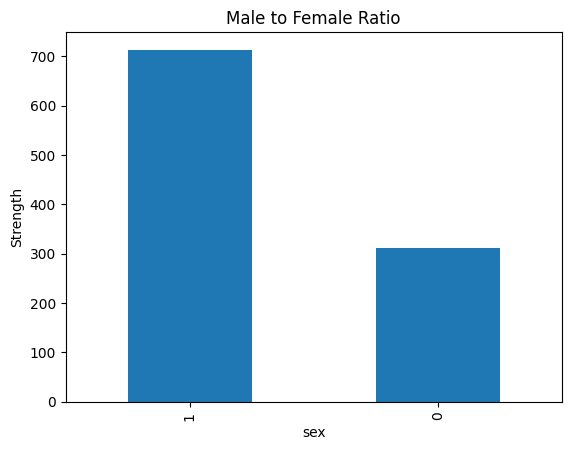

In [16]:
df['sex'].value_counts().plot(kind='bar',ylabel='Strength',title='Male to Female Ratio');

<Axes: xlabel='target', ylabel='oldpeak'>

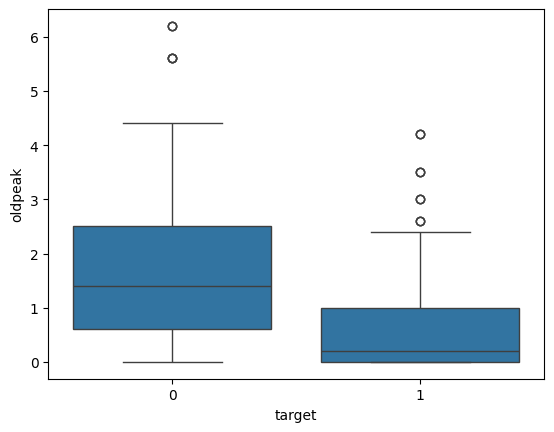

In [6]:
sns.boxplot(data=df,x='target',y='oldpeak')

<Axes: ylabel='Frequency'>

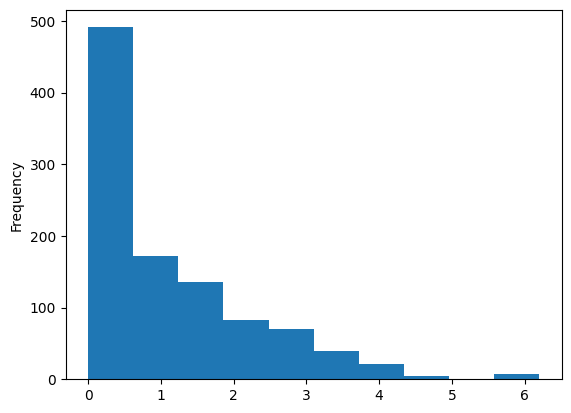

In [17]:
df['oldpeak'].plot(kind='hist')

<Axes: ylabel='Frequency'>

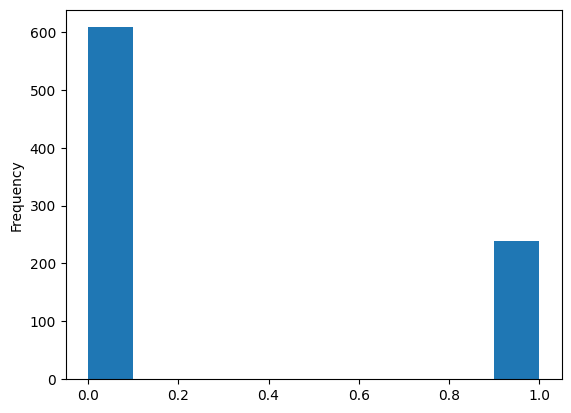

In [41]:
df['exang'].plot(kind='hist')

In [7]:
#Majority and Minority class
maj,min=df['target'].value_counts(normalize=True)
print(f" the majority class is:: {maj} and the minority class is:: {min}")
#itt is well settled dataset means the target is equally divided

 the majority class is:: 0.5131707317073171 and the minority class is:: 0.4868292682926829


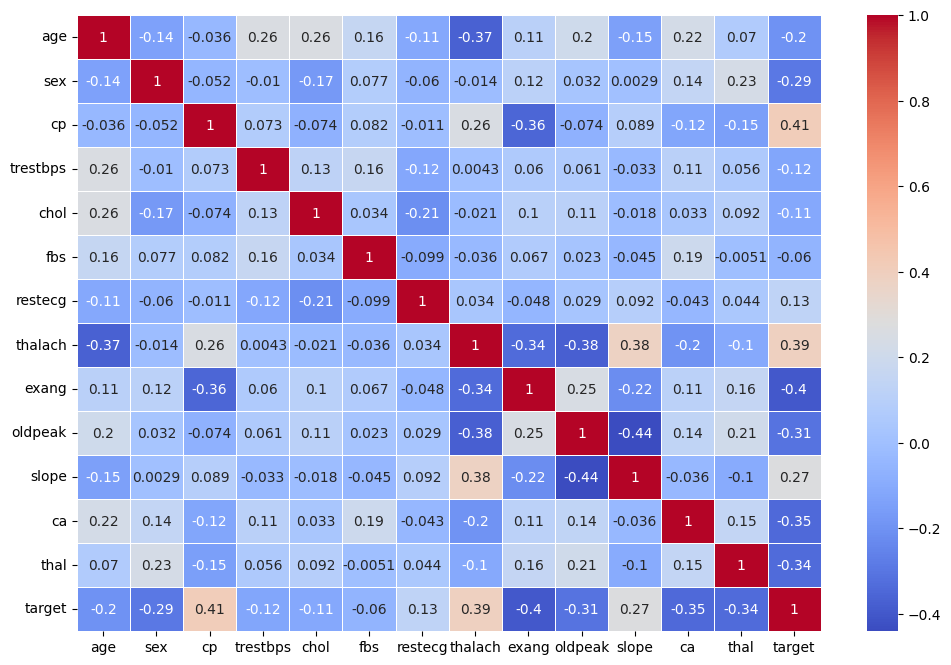

In [36]:
corr=df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5);

In [43]:
#dropping low correlated columns
df=df.drop(columns=['fbs','chol','trestbps','restecg'])

In [46]:
X=df.drop(columns='target')
Y=df['target']

In [47]:
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale the data
    ('model', LogisticRegression(random_state=42))  # Step 2: Train the model
])

# Step 3: Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(random_state=42))])

In [50]:

# evaluating for the training
y_train_pred = pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='binary')
train_recall = recall_score(y_train, y_train_pred, average='binary')
train_f1 = f1_score(y_train, y_train_pred, average='binary')

print("Train Set Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1:.4f}")
print()
# Evaluate on the validation set
y_val_pred = pipeline.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='binary')  # Use 'binary' for binary classification
val_recall = recall_score(y_val, y_val_pred, average='binary')
val_f1 = f1_score(y_val, y_val_pred, average='binary')

# Print validation results
print("Validation Set Metrics:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1-Score: {val_f1:.4f}")

# Evaluate on the test set
y_test_pred = pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='binary')  # Use 'binary' for binary classification
test_recall = recall_score(y_test, y_test_pred, average='binary')
test_f1 = f1_score(y_test, y_test_pred, average='binary')

# Print test results
print("\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")

Train Set Metrics:
Accuracy: 0.8412
Precision: 0.8325
Recall: 0.9176
F1-Score: 0.8730

Validation Set Metrics:
Accuracy: 0.8031
Precision: 0.8592
Recall: 0.8026
F1-Score: 0.8299

Test Set Metrics:
Accuracy: 0.8516
Precision: 0.8519
Recall: 0.9079
F1-Score: 0.8790


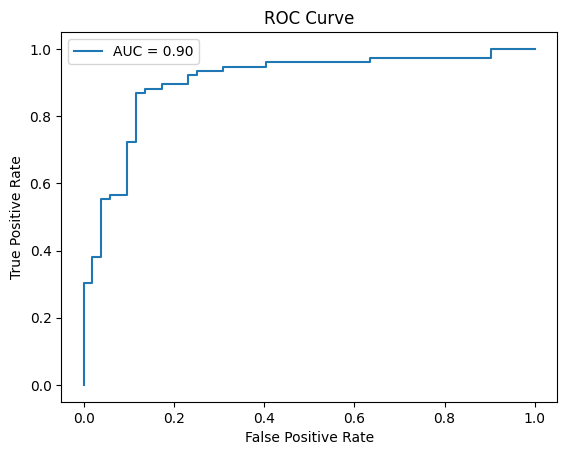

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_probs = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Cross-Validation F1 Scores: [0.91588785 0.87323944 0.89719626 0.82296651 0.82464455]
Mean F1 Score: 0.8668


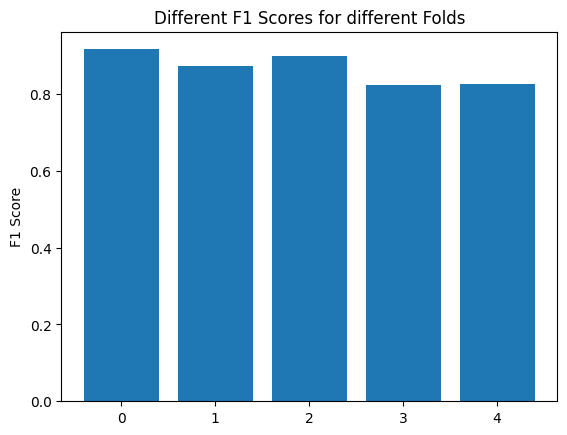

In [58]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X, Y, scoring='f1', cv=5)
print(f"Cross-Validation F1 Scores: {scores}")
print(f"Mean F1 Score: {scores.mean():.4f}")
plt.bar(x=['0','1','2','3','4'],height=scores);
plt.title('Different F1 Scores for different Folds')
plt.ylabel('F1 Score');

Now i will be doing